# Real Estate, NYC rentals (August 2024)

- Dataset containts data from rent active listings in Manhattan to the date of August 12 of 2024. 

- Creating critical thinking with data back.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("rents_active_manhattan_081224.csv")

In [3]:
df.shape

(3913, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3913 entries, 0 to 3912
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Address               3912 non-null   object 
 1   Unit                  3908 non-null   object 
 2   Asking Price          3912 non-null   float64
 3   Days on Market        3912 non-null   float64
 4   Property Type         3910 non-null   object 
 5   Sub-Nbhood            3910 non-null   object 
 6   Beds                  3903 non-null   float64
 7   Bath                  3912 non-null   float64
 8   Size                  1707 non-null   float64
 9   Yearly Price per SFT  1707 non-null   float64
 10  url                   3910 non-null   object 
dtypes: float64(6), object(5)
memory usage: 336.4+ KB


In [5]:
df.isna().sum()

Address                    1
Unit                       5
Asking Price               1
Days on Market             1
Property Type              3
Sub-Nbhood                 3
Beds                      10
Bath                       1
Size                    2206
Yearly Price per SFT    2206
url                        3
dtype: int64

### After talking with Licensed Real Estate NYC Agent they advised:

- It is normal from leasing agents/offices to avoid putting the total of square feet on floor plan.
- Columns Size and Yearly Price per SFT have more than 50% of they data Null!. Which this is a significant number.
  
- Do not drop nulls on Size and Yearly Price per SFT columns for now, because is a significant number of the data.

- To do not dig into the whole dataframe for 14 rows with Nulls, I will drop the Nulls on the columns, except for Size and SFT columns.

In [6]:
# Drop rows where any null value exists in columns 'X' or 'Y'
df_cleaned = df.dropna(subset=['Address', 'Unit', 'Asking Price',
                               'Days on Market', 'Property Type', 'Sub-Nbhood',
                               'Beds', 'Bath', 'url'])
print(df_cleaned)

                    Address       Unit  Asking Price  Days on Market  \
0             4 PARK AVENUE        21K        4500.0             1.0   
1          87 EAST 7 STREET         4A        4675.0             1.0   
2        303 EAST 49 STREET         6A        2400.0             1.0   
3           15 HUDSON YARDS        37A       15000.0             1.0   
4         1771 FIRST AVENUE         12        2400.0             1.0   
...                     ...        ...           ...             ...   
3905        465 PARK AVENUE       25EW       50000.0           688.0   
3906        465 PARK AVENUE        26C       15000.0           689.0   
3907       815 FIFTH AVENUE  RESIDENCE      140000.0           803.0   
3908  35 CENTRAL PARK NORTH        1AB        9000.0           841.0   
3909     154 ORCHARD STREET         15        2200.0          1521.0   

     Property Type       Sub-Nbhood  Beds  Bath    Size  Yearly Price per SFT  \
0           RENTAL    Midtown South   1.0   1.0     Na

In [7]:
df_cleaned.shape

(3899, 11)

- Before (3913, 11)

In [8]:
df_cleaned.describe()

Asking Price  Days on Market         Beds         Bath           Size  \
count    3899.000000     3899.000000  3899.000000  3899.000000    1705.000000   
mean     8473.610156       45.544242     1.674019     1.569761    1833.962463   
std     13803.206035       64.568090     1.217779     0.967139   14844.162147   
min       750.000000        1.000000     0.000000     0.000000       2.000000   
25%      3650.000000       11.000000     1.000000     1.000000     718.000000   
50%      4999.000000       26.000000     2.000000     1.000000    1105.000000   
75%      8300.000000       58.000000     2.000000     2.000000    1794.000000   
max    600000.000000     1521.000000    12.000000     9.500000  612462.000000   

       Yearly Price per SFT  
count           1705.000000  
mean             156.306038  
std             2474.389501  
min                0.146948  
25%               69.709091  
50%               84.705882  
75%              103.658537  
max           102000.000000

# ADD IMAGES REAL ESTATE MISTAKE ON THE 600K

https://www.urbandigs.com/building/310-bowery/3b/rental-listing/?agentid=42202

- 310 BOWERY 3B at 600,000.00 monthly is not an outlier.
- Is a mistake from the Real Estate Agent, they/them intended to lower the rental price from 6,500 to 6,6000
- Instead of advertising for 6,000.00 dollars they/them wrote 600,000.00 dollars.

In [9]:
# library to import images
from IPython import display

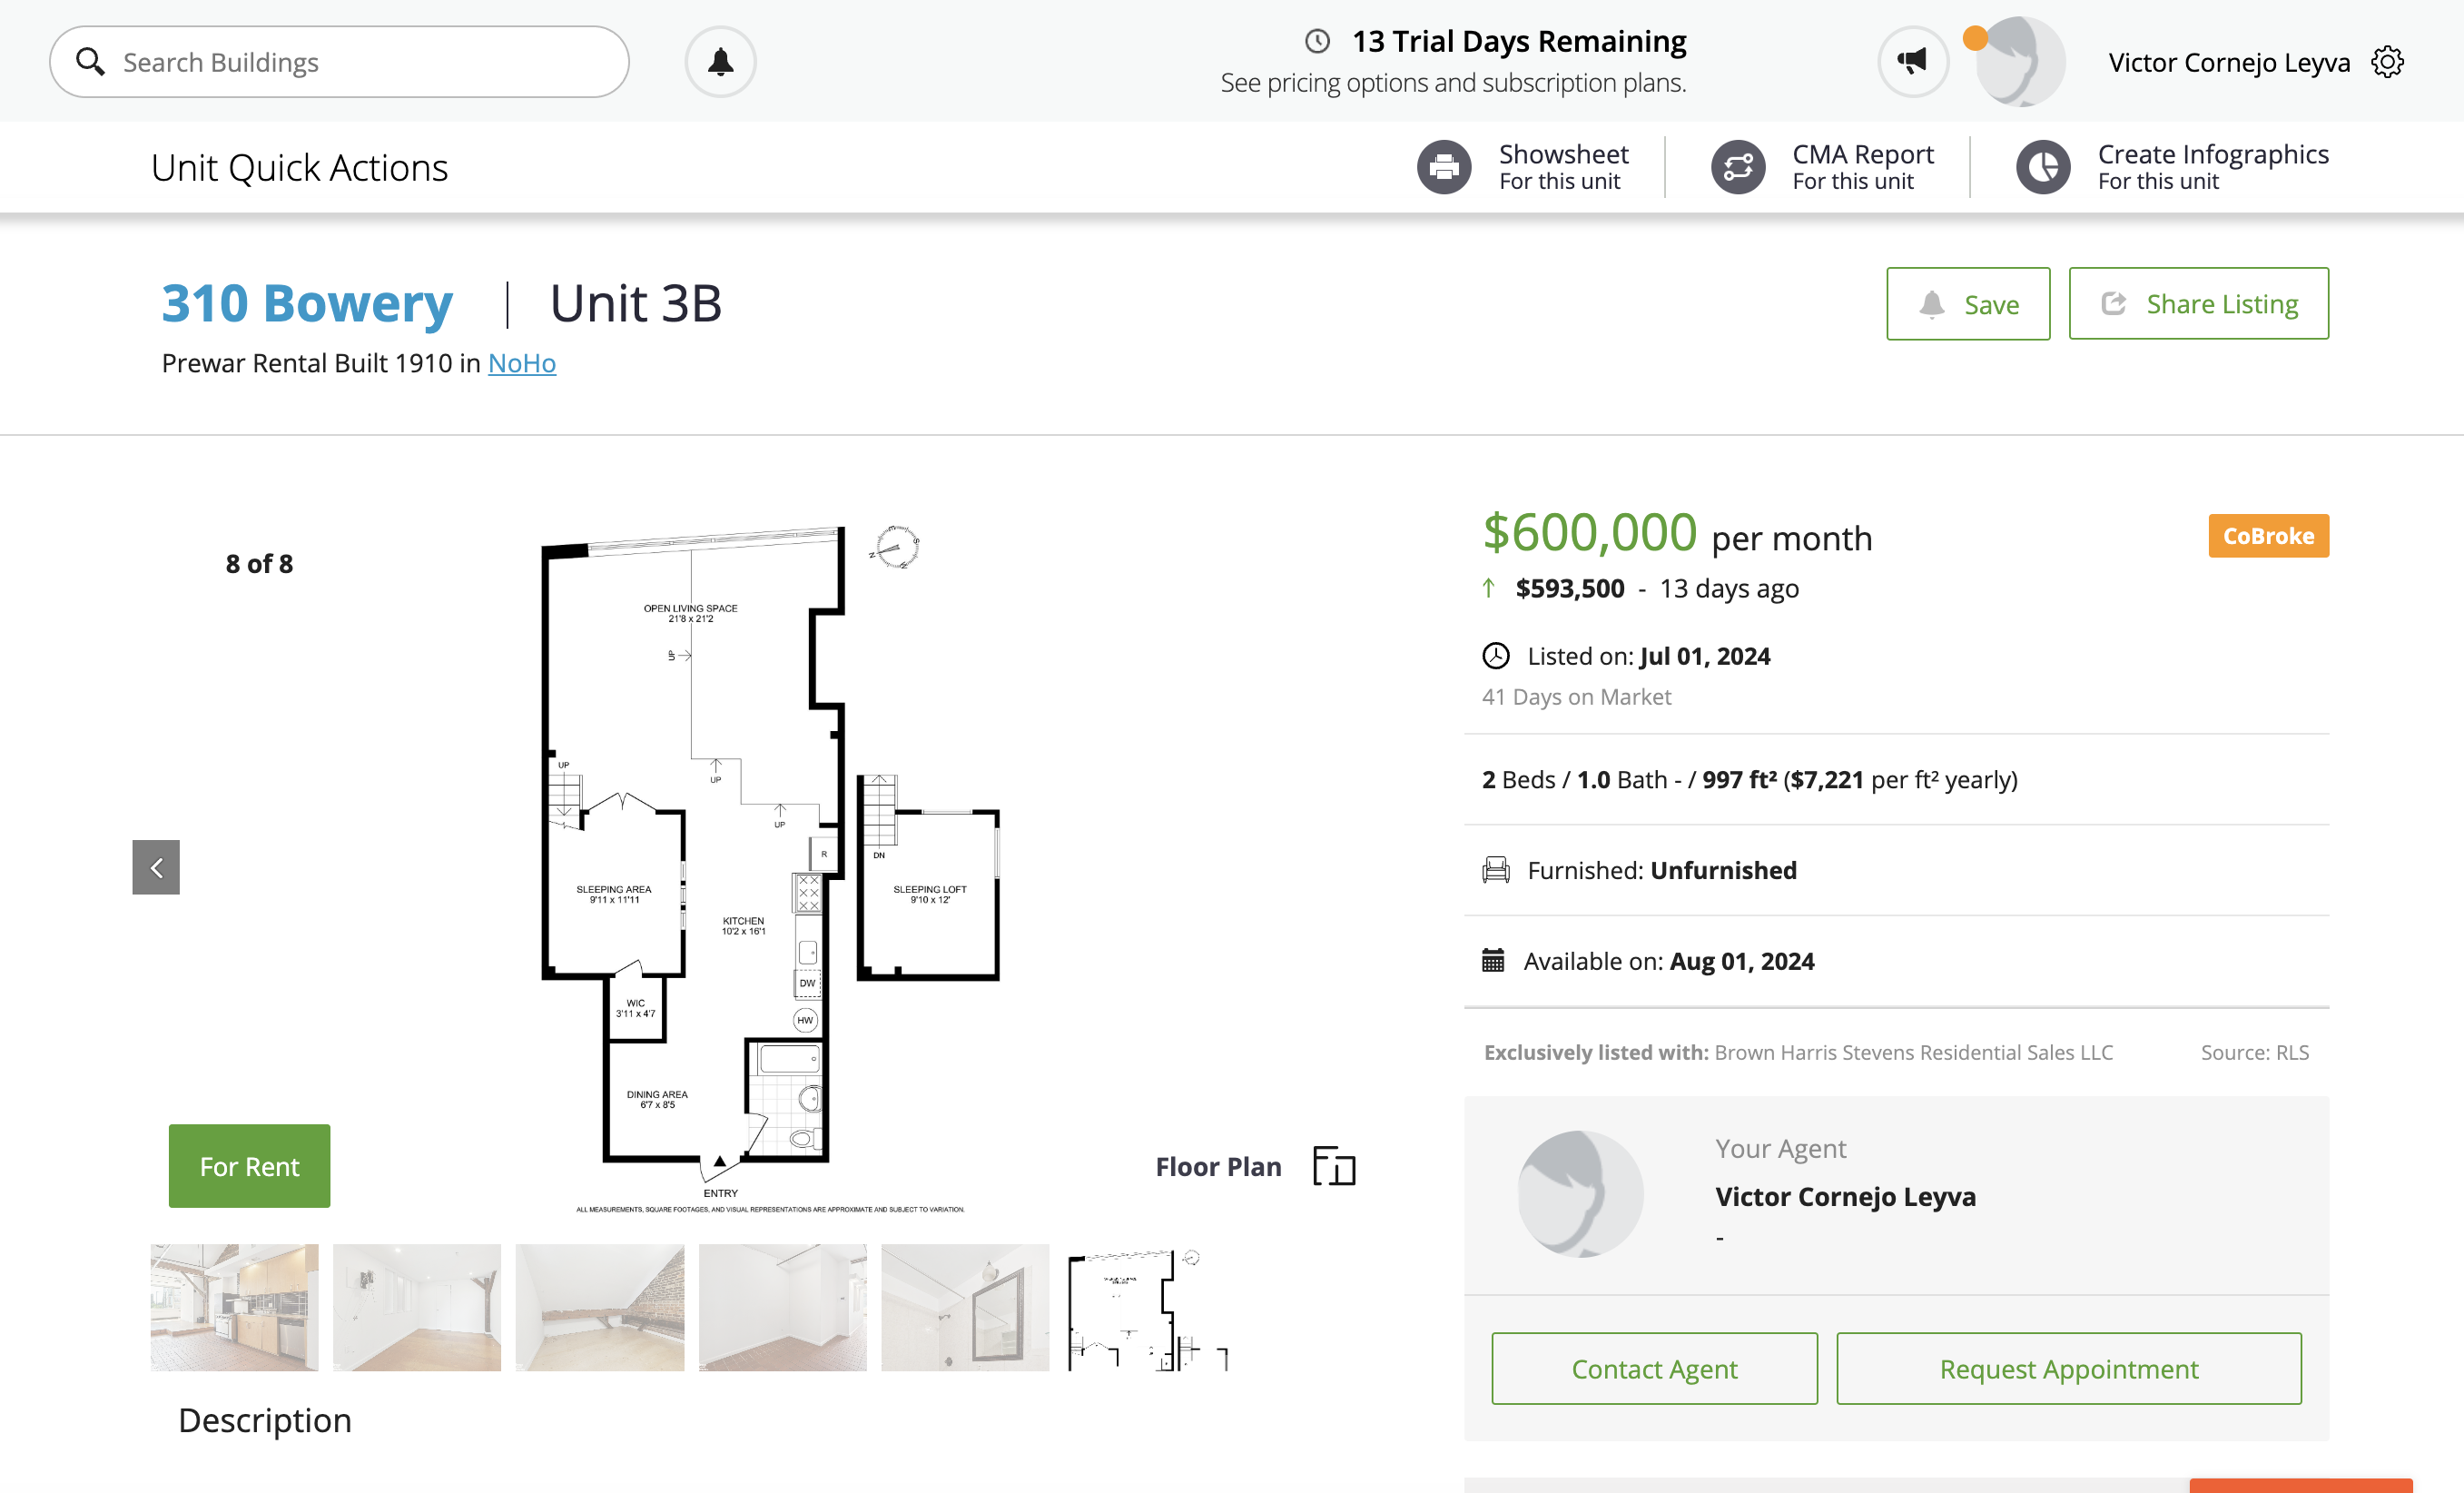

In [10]:
display.Image('310_bowery_600k.png')

In [11]:
display.Image('310_bowery_600k_6k.png')

In [12]:
# Update the value at row 2513, column 'Asking Price'
df_cleaned.at[2513, 'Asking Price'] = 6000.0

# Print the updated DataFrame to verify the change
print(df_cleaned.loc[2513])

Address                            310 BOWERY
Unit                                       3B
Asking Price                           6000.0
Days on Market                           41.0
Property Type                          RENTAL
Sub-Nbhood                               NoHo
Beds                                      2.0
Bath                                      1.0
Size                                    997.0
Yearly Price per SFT              7221.664995
url                      View 3B on Urbandigs
Name: 2513, dtype: object


In [13]:
df_cleaned.describe()

Asking Price  Days on Market         Beds         Bath           Size  \
count    3899.000000     3899.000000  3899.000000  3899.000000    1705.000000   
mean     8321.263401       45.544242     1.674019     1.569761    1833.962463   
std     10037.030406       64.568090     1.217779     0.967139   14844.162147   
min       750.000000        1.000000     0.000000     0.000000       2.000000   
25%      3650.000000       11.000000     1.000000     1.000000     718.000000   
50%      4999.000000       26.000000     2.000000     1.000000    1105.000000   
75%      8300.000000       58.000000     2.000000     2.000000    1794.000000   
max    140000.000000     1521.000000    12.000000     9.500000  612462.000000   

       Yearly Price per SFT  
count           1705.000000  
mean             156.306038  
std             2474.389501  
min                0.146948  
25%               69.709091  
50%               84.705882  
75%              103.658537  
max           102000.000000

# Basic Statistics - insights
- Checking the statistics in the table above, and now the max value at 140,000 sounds realistic (before 600,000)

# Days in Market column - insights
- This building is on Market since March 2020
  https://www.urbandigs.com/building/154-orchard-street/15/rental-listing/?agentid=42202
- Listing is not duplicated on the dataset
- I want to use Days on Market for my charts

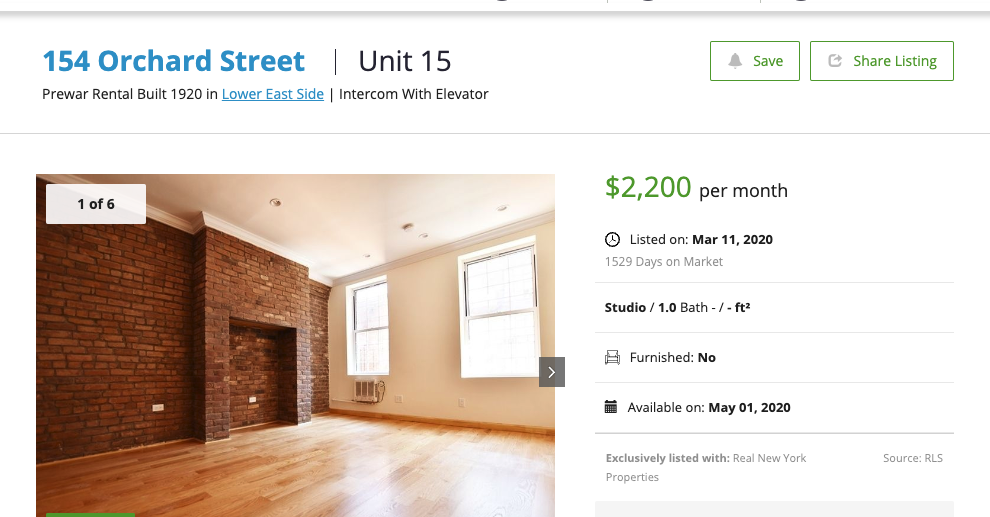

In [14]:
display.Image('154_orchard_days.png')

# Size column - insights
- This building is not 612,462 ft²
- I am not modyfing the size because size will not be related to my charts
https://www.urbandigs.com/building/124-west-60-street/48e/rental-listing/?agentid=42202

# Dropping a row

- I decided to delete the rental above with 1521 days on marnet, and I decided to do not change the 1521 days on market, for the average of 29 days on market, because is not possible that this rental is here since March 2020 without occupant/resident. Real Estate Agent might lost the login credentials details to update status, maybe the address was sold or is under legal trial, or another reasons.

In [15]:
# Delete rows where 'Days on Market' is 1521
df_cleaned = df_cleaned[df_cleaned['Days on Market'] != 1521]

# Display the DataFrame after deletion
print("\nAfter deletion:")
print(df_cleaned)


After deletion:
                    Address       Unit  Asking Price  Days on Market  \
0             4 PARK AVENUE        21K        4500.0             1.0   
1          87 EAST 7 STREET         4A        4675.0             1.0   
2        303 EAST 49 STREET         6A        2400.0             1.0   
3           15 HUDSON YARDS        37A       15000.0             1.0   
4         1771 FIRST AVENUE         12        2400.0             1.0   
...                     ...        ...           ...             ...   
3904       13 EAST 9 STREET         3R        6950.0           522.0   
3905        465 PARK AVENUE       25EW       50000.0           688.0   
3906        465 PARK AVENUE        26C       15000.0           689.0   
3907       815 FIFTH AVENUE  RESIDENCE      140000.0           803.0   
3908  35 CENTRAL PARK NORTH        1AB        9000.0           841.0   

     Property Type         Sub-Nbhood  Beds  Bath    Size  \
0           RENTAL      Midtown South   1.0   1.0     NaN

df_cleaned.describe()

- Now the max value of Days on Market sounds realistic

In [16]:
df_cleaned['Bath'].value_counts()

Bath
1.0    2336
2.0     730
2.5     216
1.5     155
3.0     144
3.5     127
4.5      62
0.0      45
4.0      28
5.5      21
6.5      10
0.5       9
5.0       7
7.5       5
8.0       1
8.5       1
9.5       1
Name: count, dtype: int64

# Bath column - insights
- 45 rentals with 0 bathrooms.
- But when I checked URL of listings, rental listings will have a bathroom on floorplan and even 2 baths.
- For example, on 66 Madison Avenue, Unit 3BC, Coop Built in 1917 in NoMad, the Real Estate Agent did the mistake of not introducing the Bath number on filters on the website.
- https://www.urbandigs.com/building/66-madison-avenue/3bc/rental-listing/?agentid=42202

In [17]:
display.Image('66_madison_2baths_rental.png')

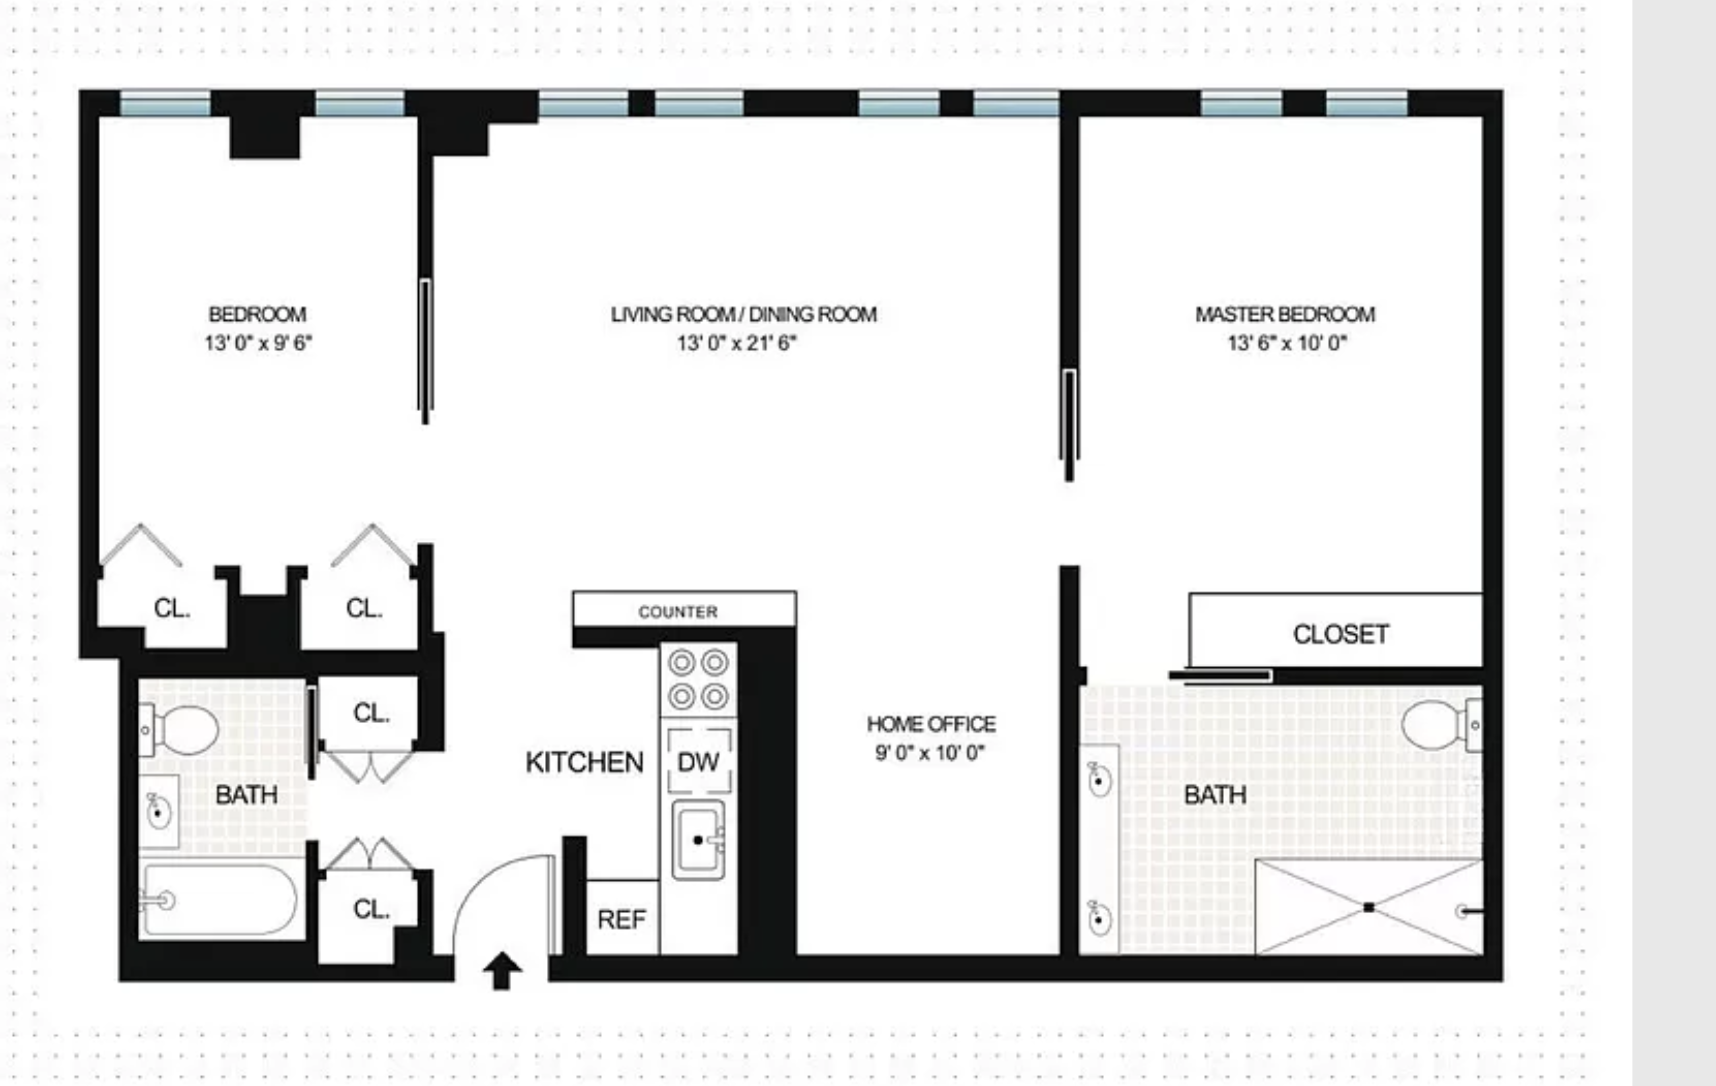

In [18]:
display.Image('66_madison_2baths_rental_floorplan.png')

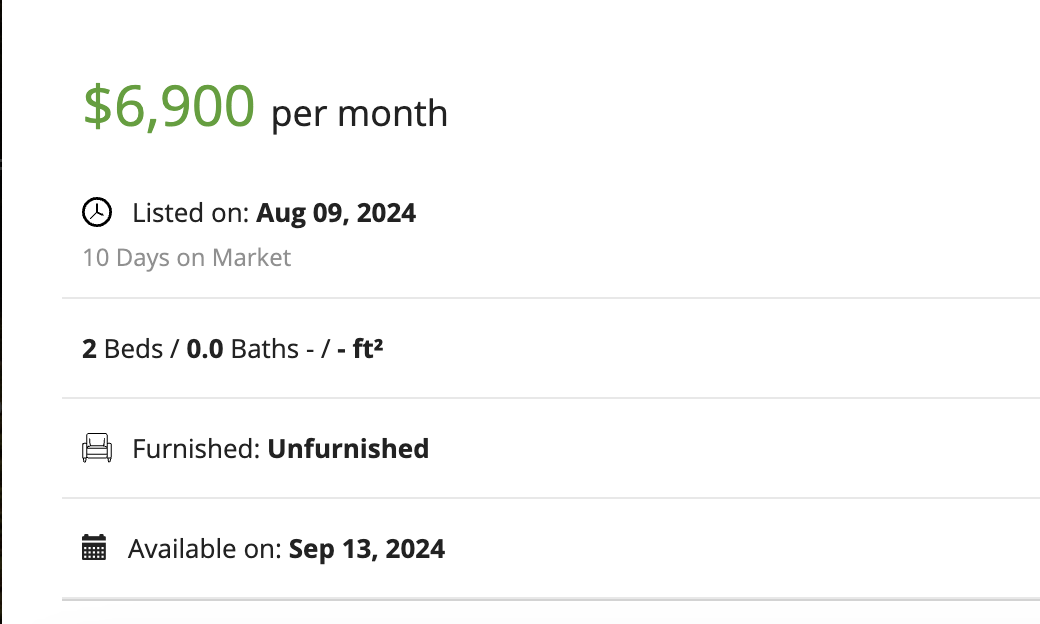

In [19]:
display.Image('66_madison_2baths_rental_filters_mistake.png')

In [20]:
# Turning the decimals into integers on numerical columns
columns_to_convert = ['Asking Price', 'Days on Market', 'Beds', 'Bath']
df_cleaned[columns_to_convert] = df_cleaned[columns_to_convert].astype(int)

In [21]:
# Deleted decimals to make it more user friendly and more light visually
print(df_cleaned.dtypes)

Address                  object
Unit                     object
Asking Price              int64
Days on Market            int64
Property Type            object
Sub-Nbhood               object
Beds                      int64
Bath                      int64
Size                    float64
Yearly Price per SFT    float64
url                      object
dtype: object


- Numerical data now is more user friendly, especially for Bath column

In [22]:
df_cleaned['Bath'].value_counts()

Bath
1    2491
2     946
3     271
4      90
0      54
5      28
6      10
7       5
8       2
9       1
Name: count, dtype: int64

# Dataset has duplicate values?

In [23]:
# Identify duplicate rows based on both 'Address' and 'Unit'
duplicates = df_cleaned[df_cleaned.duplicated(subset=['Address', 'Unit'], keep=False)]

# Display duplicate rows
print("\nDuplicate rows based on Address and Unit:")
print(duplicates)


Duplicate rows based on Address and Unit:
                  Address    Unit  Asking Price  Days on Market Property Type  \
449    321 EAST 53 STREET       1         10000               5     TOWNHOUSE   
450    321 EAST 53 STREET       1         10000               5     TOWNHOUSE   
503     55 WEST 17 STREET    1401         40000               6         CONDO   
504     55 WEST 17 STREET    1401         40000               6         CONDO   
593    216 EAST 39 STREET       3          4500               6     TOWNHOUSE   
597    216 EAST 39 STREET       3          4500               6     TOWNHOUSE   
627   110 CHARLTON STREET     20B         18650               7         CONDO   
628   110 CHARLTON STREET     20B         18650               7         CONDO   
1123  261 WEST 132 STREET  GARDEN          6995              12     TOWNHOUSE   
1124  261 WEST 132 STREET  GARDEN          6995              12     TOWNHOUSE   
2020   32 WEST 126 STREET       1          5600              28   

- Checking URL of duplicate listings.
What are the differences?

Listing 1
https://www.urbandigs.com/building/611-west-145-street/2/rental-listing/?agentid=42202

Listing 2 
https://www.urbandigs.com/building/611-west-145-street/2/rental-listing/?agentid=42202

Differences are only in Asking Price and minimal, but we are talking about the same unit.

In [24]:
# Remove duplicate rows but keep the first occurrence
df_cleaned_unique = df_cleaned.drop_duplicates(subset=['Address', 'Unit'], keep='first')

# Display the DataFrame after removing duplicates
print("\nDataFrame after removing duplicates (keeping the first occurrence):")
print(df_cleaned_unique)


DataFrame after removing duplicates (keeping the first occurrence):
                    Address       Unit  Asking Price  Days on Market  \
0             4 PARK AVENUE        21K          4500               1   
1          87 EAST 7 STREET         4A          4675               1   
2        303 EAST 49 STREET         6A          2400               1   
3           15 HUDSON YARDS        37A         15000               1   
4         1771 FIRST AVENUE         12          2400               1   
...                     ...        ...           ...             ...   
3904       13 EAST 9 STREET         3R          6950             522   
3905        465 PARK AVENUE       25EW         50000             688   
3906        465 PARK AVENUE        26C         15000             689   
3907       815 FIFTH AVENUE  RESIDENCE        140000             803   
3908  35 CENTRAL PARK NORTH        1AB          9000             841   

     Property Type         Sub-Nbhood  Beds  Bath    Size  \
0    

- Deleted 10 rows that were duplicates values
- Before removing duplicates [3898 rows x 11 columns]

In [25]:
# Checking Sub-Nbhood
df_cleaned_unique['Sub-Nbhood'].value_counts()

Sub-Nbhood
East Village                    243
Upper West Side                 239
Yorkville                       216
Chelsea                         199
Hells Kitchen                   193
Midtown Center                  188
Murray Hill                     182
Lenox Hill                      180
Financial District              155
Central Harlem                  154
Upper East Side                 129
East Harlem                     127
Turtle Bay                      110
Lincoln Square                  109
Greenwich Village               105
West Village                     99
TriBeCa                          98
Lower East Side                  92
South Harlem                     90
Gramercy Park                    90
Kips Bay                         75
Manhattan Valley                 64
Sutton Place                     63
Midtown South                    59
Carnegie Hill                    58
SoHo                             58
NoMad                            53
Hamilton Heights 

- I do not want to base my Data Analysis on street names and units.
- I want to base in areas where the neighboorhoods are located.
- I will reduce my dataset by deleting columns I do not need and take memory.

In [26]:
# List of columns to remove Address, Unit, Bath, Size, Yearly Price per SFT and url
columns_to_remove = ['Address',	'Unit', 'Bath', 'Size',	'Yearly Price per SFT', 'url']

# Drop the columns from df_cleaned_unique
df_cleaned_unique = df_cleaned_unique.drop(columns=columns_to_remove)

# Display the DataFrame to verify the change
print(df_cleaned_unique)

      Asking Price  Days on Market Property Type         Sub-Nbhood  Beds
0             4500               1        RENTAL      Midtown South     1
1             4675               1     TOWNHOUSE       East Village     2
2             2400               1         CONDO         Turtle Bay     0
3            15000               1         CONDO       Hudson Yards     2
4             2400               1        RENTAL          Yorkville     1
...            ...             ...           ...                ...   ...
3904          6950             522        RENTAL  Greenwich Village     1
3905         50000             688          COOP     Midtown Center     3
3906         15000             689          COOP     Midtown Center     1
3907        140000             803         CONDO         Lenox Hill     3
3908          9000             841        RENTAL       South Harlem     0

[3888 rows x 5 columns]


- Before deleting columns [3888 rows x 11 columns]
- Deleted 6 colunmns that were not fundamental for my Data Analysis

In [27]:
df_cleaned_unique.describe()

Asking Price  Days on Market         Beds
count    3888.000000     3888.000000  3888.000000
mean     8317.146605       45.186986     1.673354
std     10035.385897       60.142086     1.217018
min       750.000000        1.000000     0.000000
25%      3650.000000       11.000000     1.000000
50%      4997.000000       26.000000     2.000000
75%      8300.000000       58.000000     2.000000
max    140000.000000      841.000000    12.000000

### Standard Deviation at Asking Price 

- It’s common for the standard deviation (std) to be much larger than the MEDIAN due to high variability and skewness in the data.

- The MEAN might be closer to the standard deviation if the data has outliers or a long tail, as these extreme values can inflate both the mean and the standard deviation. 

- If I am analyzing rental listing prices, I should consider using additional measures like the interquartile range (IQR) or visualizing the data with Box Plots to get a better sense of the spread and central tendency...

## Handling Outliers (Extreme Values)

- I am not importing matplotlib.pyplot or seaborn because those libraries looks antiquate to me.
- Plotly.express has a higher interface and looks modern for a professional presentation.

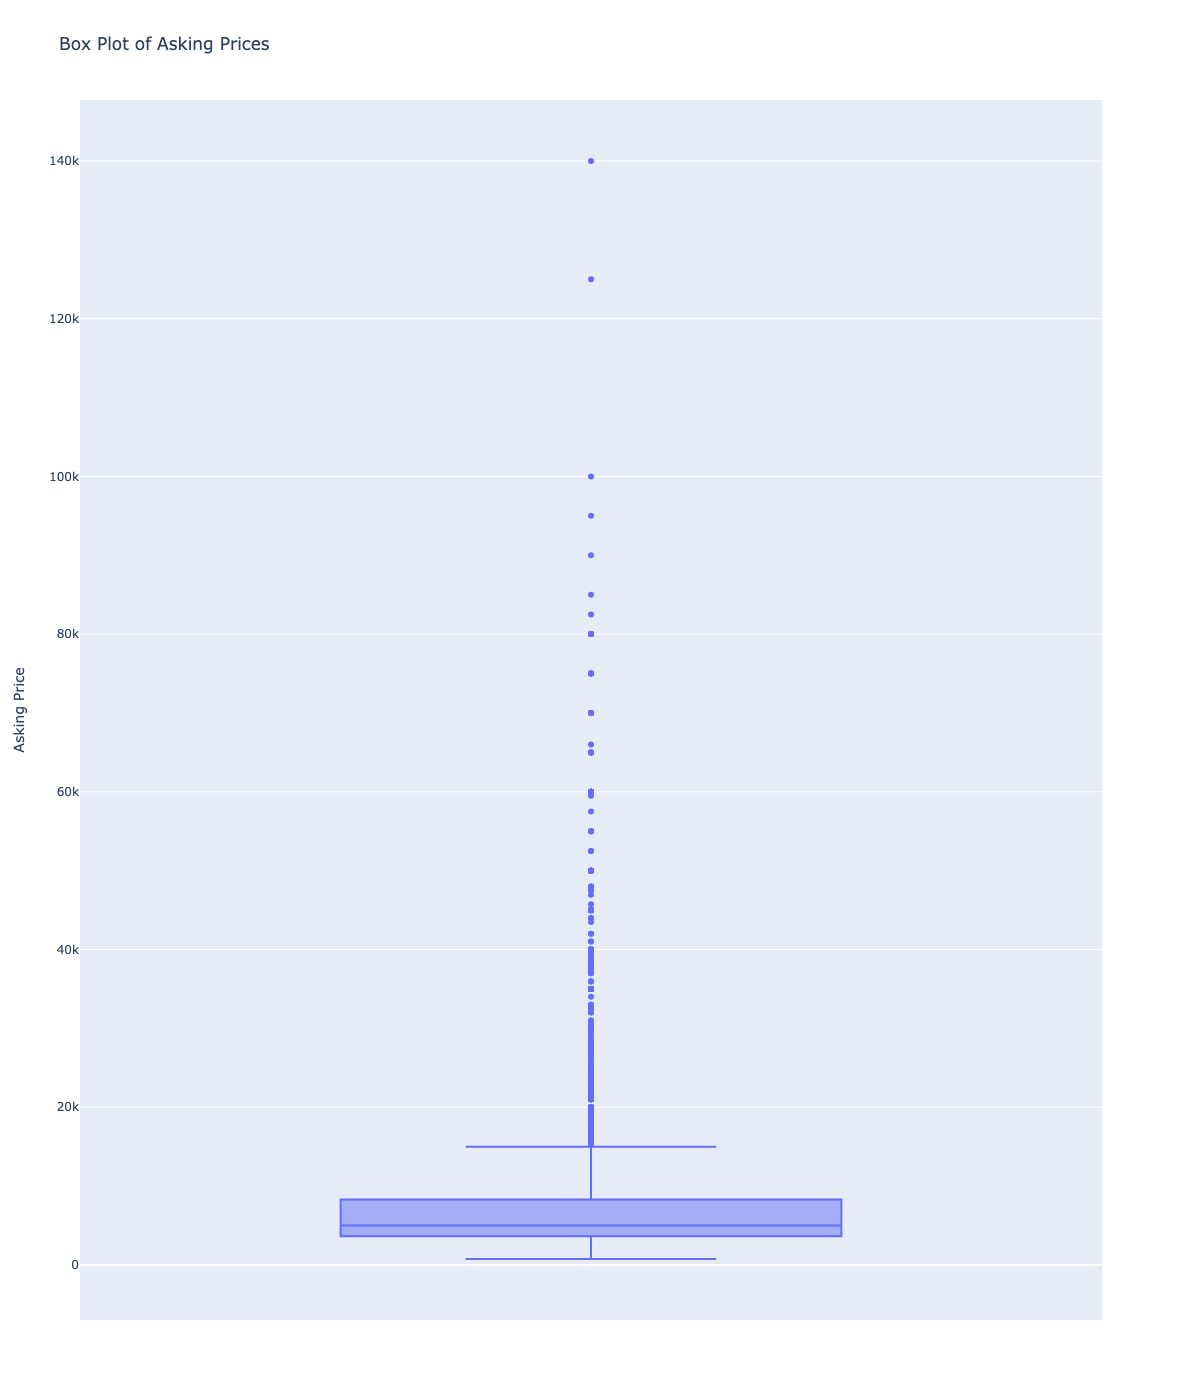

In [28]:
import plotly.express as px

# Create a box plot using plotly.express
fig = px.box(df_cleaned_unique, y='Asking Price', title='Box Plot of Asking Prices', labels={'Asking Price': 'Price'})

# Update layout to adjust chart size and y-axis label
fig.update_layout(
    yaxis_title='Asking Price',  # Optional: Add y-axis label
    width=700,  # Set the width of the chart
    height=1400  # Set the height of the chart
)

# Show the plot
fig.show()

- Asking Price column has outliers, and they are skewing my dataset.
- Outliers are all the values above the max, above $15,295 dollars.
- I will drop the rows with outliers on asking price.

In [29]:
# Filtering the DataFrame so that it only contains rows where the value in the "Asking Price" column is less than or equal to 15,295

# Drop rows where 'Asking Price' is greater than 15,295
df_cleaned_unique = df_cleaned_unique[df_cleaned_unique['Asking Price'] <= 15295]

# Display the cleaned DataFrame
print(df_cleaned_unique)

      Asking Price  Days on Market Property Type         Sub-Nbhood  Beds
0             4500               1        RENTAL      Midtown South     1
1             4675               1     TOWNHOUSE       East Village     2
2             2400               1         CONDO         Turtle Bay     0
3            15000               1         CONDO       Hudson Yards     2
4             2400               1        RENTAL          Yorkville     1
...            ...             ...           ...                ...   ...
3901          5500             521         CONDO              NoMad     1
3902          8625             557        RENTAL     Central Harlem     4
3904          6950             522        RENTAL  Greenwich Village     1
3906         15000             689          COOP     Midtown Center     1
3908          9000             841        RENTAL       South Harlem     0

[3459 rows x 5 columns]


- Before 3888 rows

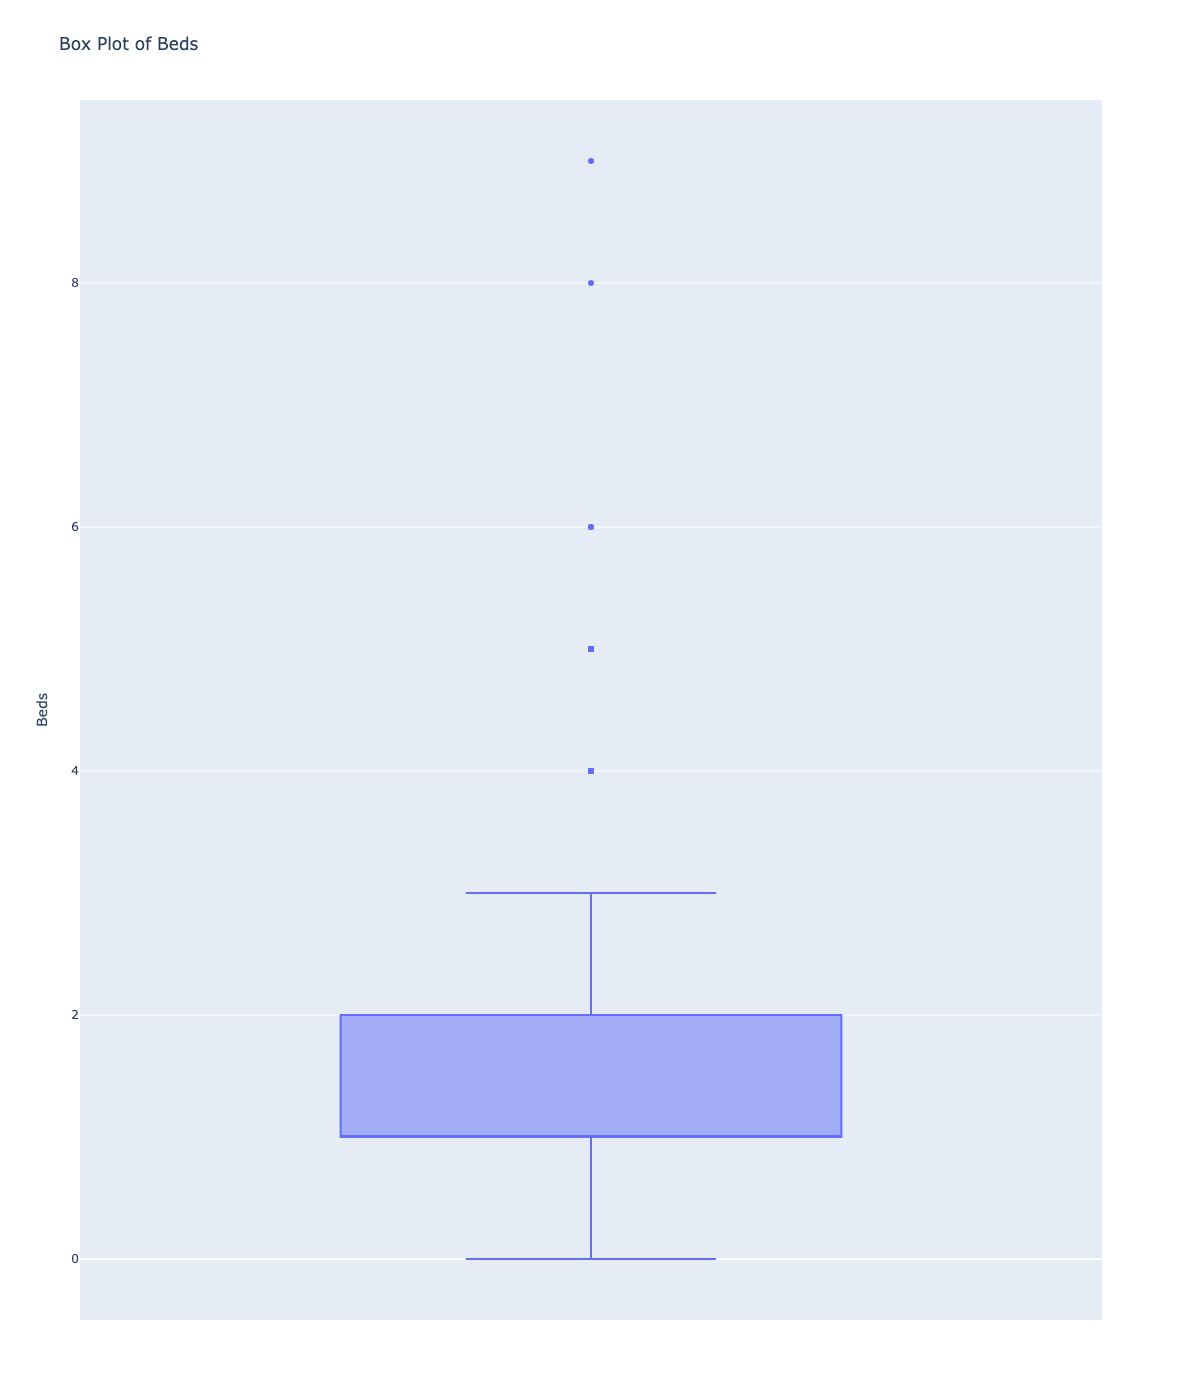

In [30]:
# Create a box plot using plotly.express
fig = px.box(df_cleaned_unique, y='Beds', title='Box Plot of Beds', labels={'Beds': '#'})

# Update layout to adjust chart size and y-axis label
fig.update_layout(
    yaxis_title='Beds',  # Optional: Add y-axis label
    width=700,  # Set the width of the chart
    height=1400  # Set the height of the chart
)

# Show the plot
fig.show()

- Beds column, there are around 100 outliers, and they are skewing my dataset.
- Outliers are all the values above the max, above 3 bedrooms.
- I do not want to change the value of bedrooms above 3 Beds, E.G. 4, 5, 6, 7, 8 and 9 to 3 Beds, to indicate 3+ Beds, because the Asking Prices will skew my dataset on mean and median on Asking Prices per Beds.

In [31]:
# Drop rows where 'Beds' is greater than 3
df_cleaned_unique = df_cleaned_unique[df_cleaned_unique['Beds'] <= 3]

# Display the cleaned DataFrame
print(df_cleaned_unique)

      Asking Price  Days on Market Property Type         Sub-Nbhood  Beds
0             4500               1        RENTAL      Midtown South     1
1             4675               1     TOWNHOUSE       East Village     2
2             2400               1         CONDO         Turtle Bay     0
3            15000               1         CONDO       Hudson Yards     2
4             2400               1        RENTAL          Yorkville     1
...            ...             ...           ...                ...   ...
3900          8000             463         CONDO     Midtown Center     1
3901          5500             521         CONDO              NoMad     1
3904          6950             522        RENTAL  Greenwich Village     1
3906         15000             689          COOP     Midtown Center     1
3908          9000             841        RENTAL       South Harlem     0

[3339 rows x 5 columns]


- 3459 rows before

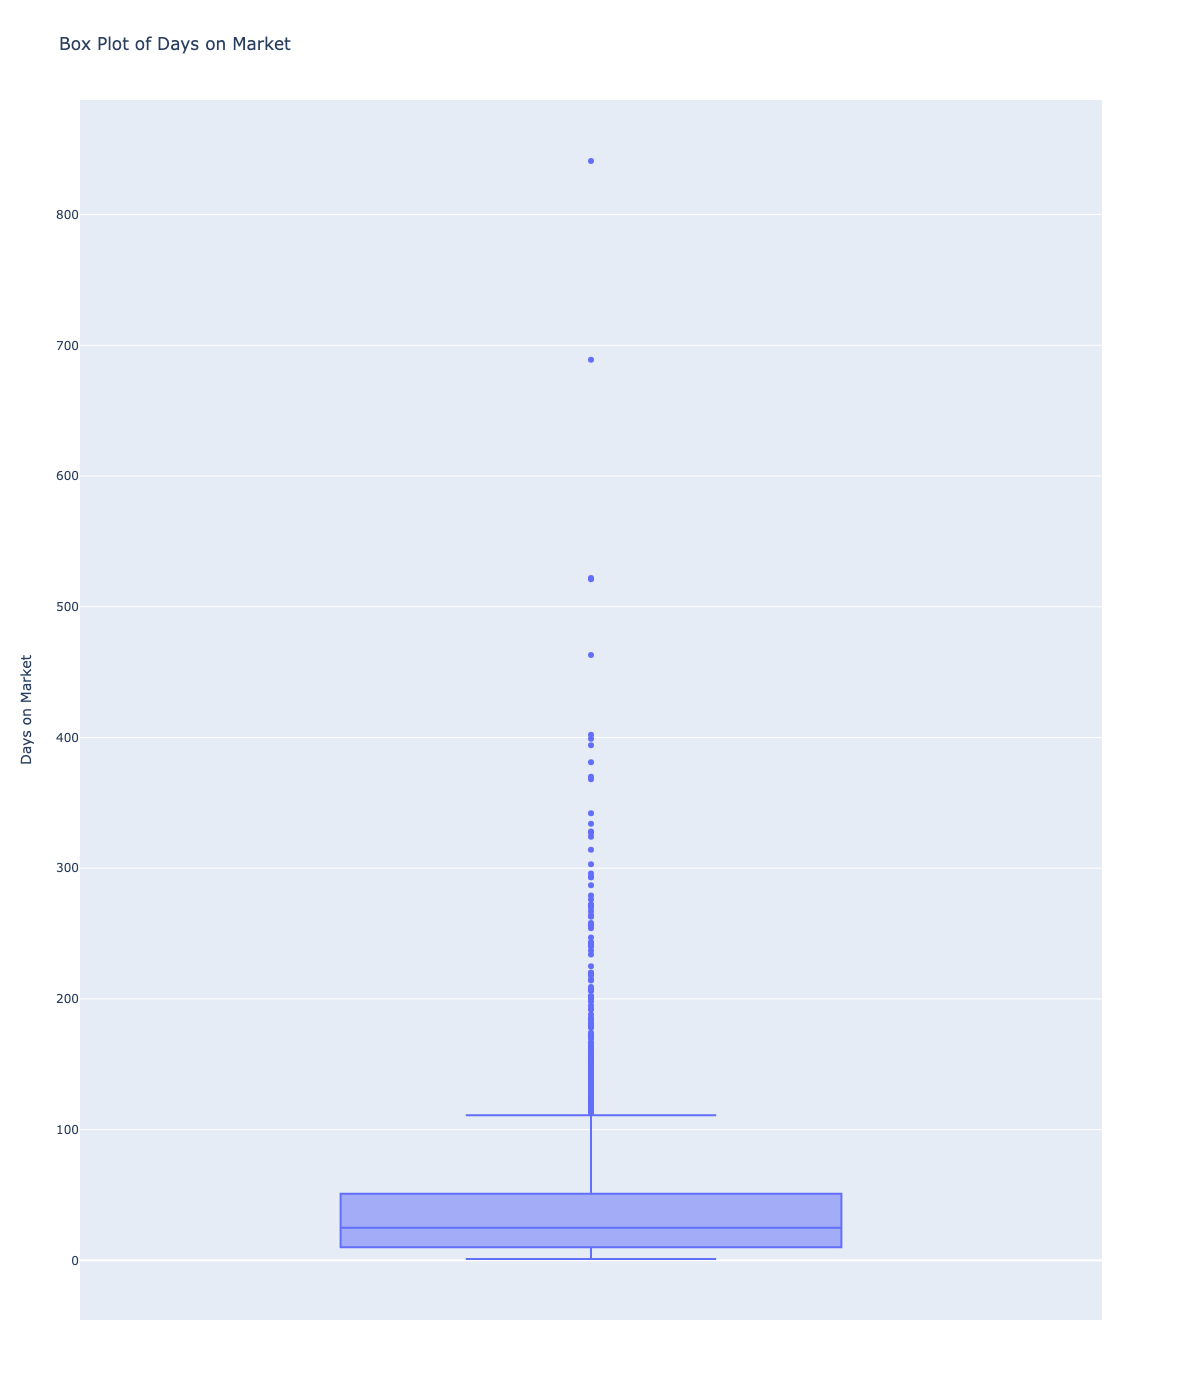

In [32]:
# Create a box plot using plotly.express
fig = px.box(df_cleaned_unique, y='Days on Market', title='Box Plot of Days on Market', labels={'Days on Market': '#'})

# Update layout to adjust chart size and y-axis label
fig.update_layout(
    yaxis_title='Days on Market',  # Optional: Add y-axis label
    width=700,  # Set the width of the chart
    height=1400  # Set the height of the chart
)

# Show the plot
fig.show()

- Days on Market column.
- Outliers are those that have more than 111 Days on Market

In [33]:
# Drop rows where 'Days on Market' is greater than 111
df_cleaned_unique = df_cleaned_unique[df_cleaned_unique['Days on Market'] <= 111]

# Display the cleaned DataFrame
print(df_cleaned_unique)

      Asking Price  Days on Market Property Type      Sub-Nbhood  Beds
0             4500               1        RENTAL   Midtown South     1
1             4675               1     TOWNHOUSE    East Village     2
2             2400               1         CONDO      Turtle Bay     0
3            15000               1         CONDO    Hudson Yards     2
4             2400               1        RENTAL       Yorkville     1
...            ...             ...           ...             ...   ...
3716          6125             109        RENTAL         TriBeCa     1
3726          8993             105        RENTAL  Midtown Center     3
3731          3995              99          COOP    Sutton Place     1
3753          9250              78         CONDO     Two Bridges     2
3824          2437              85        RENTAL  Central Harlem     0

[3125 rows x 5 columns]


- 3339 rows before

In [34]:
# Checking Sub-Nbhood
df_cleaned_unique['Property Type'].value_counts()

Property Type
RENTAL              1539
CONDO                970
COOP                 366
TOWNHOUSE            203
CONDOP                45
Development Site       1
MIXED USE              1
Name: count, dtype: int64

- Context

Rental - Own by Private Equity or Big Building (Or the Wall Street)
Condo or Coop - Owner owns their apartment but they can rent it
Townhouse - Building type
Condop - Is like a Coop

Delete Development Site and Mixed Use rows

### Using the ~ Operator
  
Summary
- With ~: Drops rows where 'Property Type' is 'Development Site' or 'MIXED USE'.
- Without ~: Keeps only rows where 'Property Type' is 'Development Site' or 'MIXED USE'.
  
The ~ is crucial for achieving the desired filtering outcome.

In [35]:
# Boolean, dropping rows where 'Property Type' is 'Development Site' or 'MIXED USE'.
df_cleaned_unique = df_cleaned_unique[~df_cleaned_unique['Property Type'].isin(['Development Site', 'MIXED USE'])]

# Display the cleaned DataFrame
print(df_cleaned_unique)

      Asking Price  Days on Market Property Type      Sub-Nbhood  Beds
0             4500               1        RENTAL   Midtown South     1
1             4675               1     TOWNHOUSE    East Village     2
2             2400               1         CONDO      Turtle Bay     0
3            15000               1         CONDO    Hudson Yards     2
4             2400               1        RENTAL       Yorkville     1
...            ...             ...           ...             ...   ...
3716          6125             109        RENTAL         TriBeCa     1
3726          8993             105        RENTAL  Midtown Center     3
3731          3995              99          COOP    Sutton Place     1
3753          9250              78         CONDO     Two Bridges     2
3824          2437              85        RENTAL  Central Harlem     0

[3123 rows x 5 columns]


In [36]:
# One last column to remove
column_to_remove = ['Property Type']

# Drop the column from df_cleaned_unique
df_cleaned_unique = df_cleaned_unique.drop(columns=column_to_remove)

# Display the DataFrame to verify the change
print(df_cleaned_unique)

      Asking Price  Days on Market      Sub-Nbhood  Beds
0             4500               1   Midtown South     1
1             4675               1    East Village     2
2             2400               1      Turtle Bay     0
3            15000               1    Hudson Yards     2
4             2400               1       Yorkville     1
...            ...             ...             ...   ...
3716          6125             109         TriBeCa     1
3726          8993             105  Midtown Center     3
3731          3995              99    Sutton Place     1
3753          9250              78     Two Bridges     2
3824          2437              85  Central Harlem     0

[3123 rows x 4 columns]


### Neighborhoods classifications

- To visualize the sub neighborhoods, I have aproximately 46 nhoods, which is not ideal for any scatter plot or bar charts, I want to reduce that classification.
- Instead of 46 clasifications, I will make 7, E.G. Upper East, Upper West, etc.
- And I will delete the 3 rows on Roosevelt Island

In [37]:
# Boolean, dropping rows where Sub-Nbhood'' is Roosevelt Island
df_cleaned_unique = df_cleaned_unique[~df_cleaned_unique['Sub-Nbhood'].isin(['Roosevelt Island'])]

# Display the cleaned DataFrame
print(df_cleaned_unique)

      Asking Price  Days on Market      Sub-Nbhood  Beds
0             4500               1   Midtown South     1
1             4675               1    East Village     2
2             2400               1      Turtle Bay     0
3            15000               1    Hudson Yards     2
4             2400               1       Yorkville     1
...            ...             ...             ...   ...
3716          6125             109         TriBeCa     1
3726          8993             105  Midtown Center     3
3731          3995              99    Sutton Place     1
3753          9250              78     Two Bridges     2
3824          2437              85  Central Harlem     0

[3120 rows x 4 columns]


- Deleted Roosevelt Island

In [38]:
df_cleaned_unique.describe()

Asking Price  Days on Market         Beds
count   3120.000000     3120.000000  3120.000000
mean    5392.683013       29.915385     1.372115
std     2747.422984       25.617990     0.917392
min      750.000000        1.000000     0.000000
25%     3500.000000       10.000000     1.000000
50%     4500.000000       23.000000     1.000000
75%     6500.000000       45.000000     2.000000
max    15295.000000      111.000000     3.000000

### Now without outlier values on asking prices, days on market and beds, this is how my numbers look, and without the propoerty types. Table above.

In [39]:
df_cleaned_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3120 entries, 0 to 3824
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Asking Price    3120 non-null   int64 
 1   Days on Market  3120 non-null   int64 
 2   Sub-Nbhood      3120 non-null   object
 3   Beds            3120 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 121.9+ KB


# Classifying Manhattan neighboorhods by geographiuc location area

- The table below is how I classified the neighborhoods on my dataset and the location.

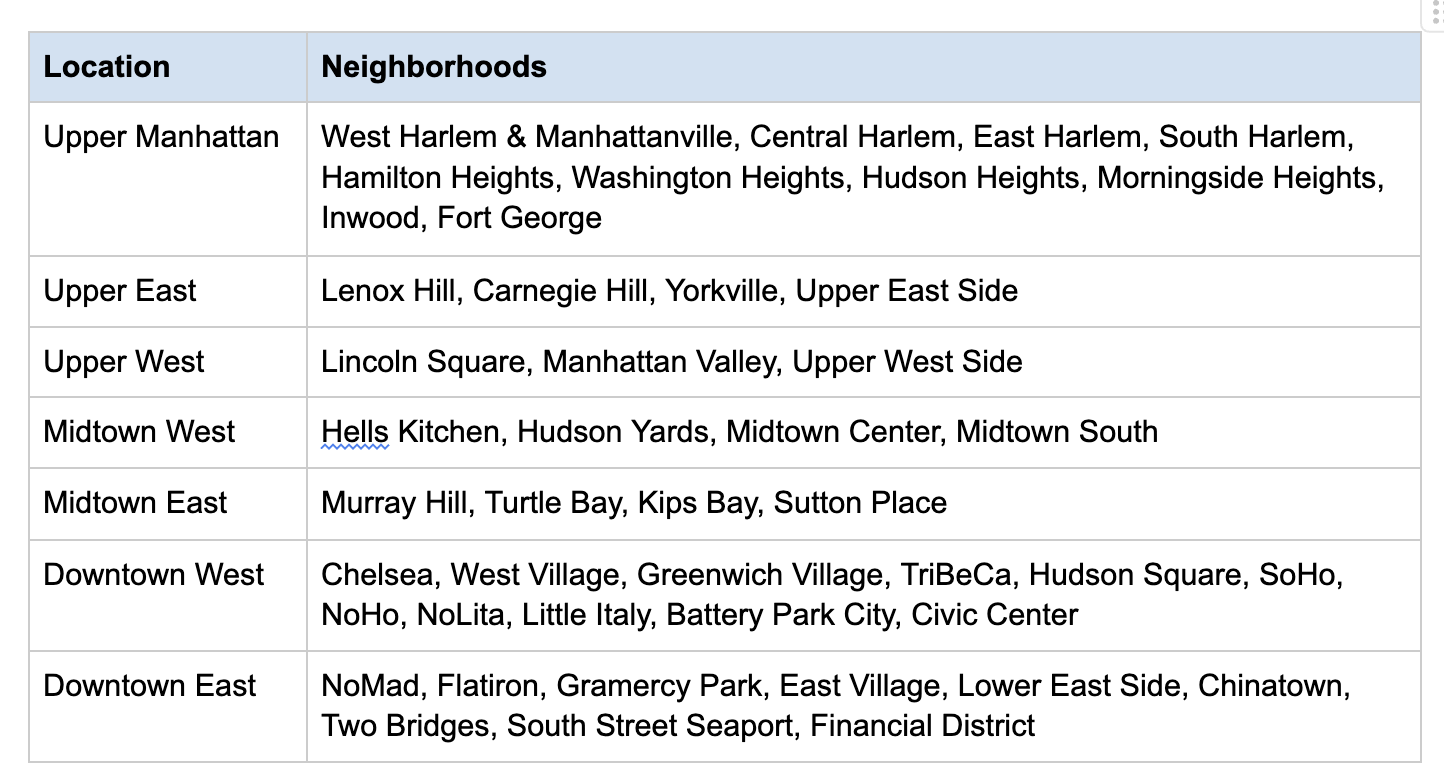

In [40]:
display.Image('tablelocations.png')

In [41]:
# Define the DataFrame with unique locations
df_cleaned_unique_location = pd.DataFrame({
    'Sub-Nbhood': [
        'West Harlem & Manhattanville', 'Central Harlem', 'East Harlem', 'South Harlem',
        'Hamilton Heights', 'Washington Heights', 'Hudson Heights', 'Morningside Heights',
        'Inwood', 'Fort George', 'Lenox Hill', 'Carnegie Hill', 'Yorkville', 'Upper East Side',
        'Lincoln Square', 'Manhattan Valley', 'Upper West Side', 'Hells Kitchen', 'Hudson Yards',
        'Chelsea', 'Midtown Center', 'Midtown South', 'Murray Hill', 'Turtle Bay', 'Kips Bay',
        'Sutton Place', 'NoMad', 'Gramercy Park', 'Flatiron', 'West Village', 'Greenwich Village',
        'TriBeCa', 'Hudson Square', 'SoHo', 'NoHo', 'NoLita', 'Little Italy', 'Battery Park City',
        'Civic Center', 'Financial District', 'East Village', 'Lower East Side', 'Chinatown', 
        'Two Bridges', 'South Street Seaport',
    ]
})

# Define the mapping for Sub-Nbhood to Location
location_mapping = {
    'West Harlem & Manhattanville': 'Upper Manhattan',
    'Central Harlem': 'Upper Manhattan',
    'East Harlem': 'Upper Manhattan',
    'South Harlem': 'Upper Manhattan',
    'Hamilton Heights': 'Upper Manhattan',
    'Washington Heights': 'Upper Manhattan',
    'Hudson Heights': 'Upper Manhattan',
    'Morningside Heights': 'Upper Manhattan',
    'Inwood': 'Upper Manhattan',
    'Fort George': 'Upper Manhattan',
    'Lenox Hill': 'Upper East',
    'Carnegie Hill': 'Upper East',
    'Yorkville': 'Upper East',
    'Upper East Side': 'Upper East',
    'Lincoln Square': 'Upper West',
    'Manhattan Valley': 'Upper West',
    'Upper West Side': 'Upper West',
    'Hells Kitchen': 'Midtown West',
    'Hudson Yards': 'Midtown West',
    'Midtown Center': 'Midtown West',
    'Midtown South': 'Midtown West',
    'Murray Hill': 'Midtown East',
    'Turtle Bay': 'Midtown East',
    'Kips Bay': 'Midtown East',
    'Sutton Place': 'Midtown East',
    'Chelsea': 'Downtown West',
    'West Village': 'Downtown West',
    'Greenwich Village': 'Downtown West',
    'TriBeCa': 'Downtown West',
    'Hudson Square': 'Downtown West',
    'SoHo': 'Downtown West',
    'NoHo': 'Downtown West',
    'NoLita': 'Downtown West',
    'Little Italy': 'Downtown West',
    'Battery Park City': 'Downtown West',
    'Civic Center': 'Downtown West',
    'NoMad': 'Downtown East',
    'Flatiron': 'Downtown East',
    'Gramercy Park': 'Downtown East',
    'East Village': 'Downtown East',
    'Lower East Side': 'Downtown East',
    'Chinatown': 'Downtown East',
    'Two Bridges': 'Downtown East',
    'South Street Seaport': 'Downtown East',
    'Financial District': 'Downtown East',
}

# Create the new Location column based on the mapping
df_cleaned_unique_location['Location'] = df_cleaned_unique_location['Sub-Nbhood'].map(location_mapping)

# Display the updated DataFrame
print(df_cleaned_unique_location)

                      Sub-Nbhood         Location
0   West Harlem & Manhattanville  Upper Manhattan
1                 Central Harlem  Upper Manhattan
2                    East Harlem  Upper Manhattan
3                   South Harlem  Upper Manhattan
4               Hamilton Heights  Upper Manhattan
5             Washington Heights  Upper Manhattan
6                 Hudson Heights  Upper Manhattan
7            Morningside Heights  Upper Manhattan
8                         Inwood  Upper Manhattan
9                    Fort George  Upper Manhattan
10                    Lenox Hill       Upper East
11                 Carnegie Hill       Upper East
12                     Yorkville       Upper East
13               Upper East Side       Upper East
14                Lincoln Square       Upper West
15              Manhattan Valley       Upper West
16               Upper West Side       Upper West
17                 Hells Kitchen     Midtown West
18                  Hudson Yards     Midtown West


In [42]:
df_cleaned_unique_location.isna().sum()

Sub-Nbhood    0
Location      0
dtype: int64

In [43]:
df_cleaned_unique

Asking Price  Days on Market      Sub-Nbhood  Beds
0             4500               1   Midtown South     1
1             4675               1    East Village     2
2             2400               1      Turtle Bay     0
3            15000               1    Hudson Yards     2
4             2400               1       Yorkville     1
...            ...             ...             ...   ...
3716          6125             109         TriBeCa     1
3726          8993             105  Midtown Center     3
3731          3995              99    Sutton Place     1
3753          9250              78     Two Bridges     2
3824          2437              85  Central Harlem     0

[3120 rows x 4 columns]

### pd.merge 
- When mixing categorical and numerical values

- pd.concat if only numericals

In [44]:
# Reset indices (although this may not be necessary for merging)
df_cleaned_unique = df_cleaned_unique.reset_index(drop=True)
df_cleaned_unique_location = df_cleaned_unique_location.reset_index(drop=True)

# Perform the merge on the 'Sub-Nbhood' column
result = pd.merge(df_cleaned_unique, df_cleaned_unique_location, on='Sub-Nbhood', how='right')

# Display the result
print(f"Shape of merged result: {result.shape}")
print(result.head())

Shape of merged result: (3120, 5)
   Asking Price  Days on Market                    Sub-Nbhood  Beds  \
0          2500               6  West Harlem & Manhattanville     0   
1          3100              17  West Harlem & Manhattanville     2   
2          2650              20  West Harlem & Manhattanville     1   
3          2645              22  West Harlem & Manhattanville     0   
4          5400              59  West Harlem & Manhattanville     2   

          Location  
0  Upper Manhattan  
1  Upper Manhattan  
2  Upper Manhattan  
3  Upper Manhattan  
4  Upper Manhattan  


In [45]:
result.isna().sum()

Asking Price      0
Days on Market    0
Sub-Nbhood        0
Beds              0
Location          0
dtype: int64

In [46]:
result['Location'].value_counts()

Location
Downtown East      635
Downtown West      483
Upper Manhattan    456
Upper East         446
Midtown West       392
Midtown East       378
Upper West         330
Name: count, dtype: int64

In [47]:
unique_in_left = df_cleaned_unique['Sub-Nbhood'].nunique()
unique_in_right = df_cleaned_unique_location['Sub-Nbhood'].nunique()
print(f"Unique values in left DataFrame: {unique_in_left}")
print(f"Unique values in right DataFrame: {unique_in_right}")

Unique values in left DataFrame: 45
Unique values in right DataFrame: 45


- 45 sub-nhood
- 7 locations

# Beds column
## Changing column name and values to provide clarity

- Changing 0,1,2,3 to Studio, 1BR, 2BR, and 3BR.
- Chaning Beds to Unit Type.

### Reasons
- Clarity: Easier for users to understand and interpret the data.
- Visualization: More informative and intuitive for charts and graphs, enhancing the readability of your visualizations.
- User Experience: Makes your data more accessible, especially in presentations or dashboards where clarity is crucial.

In [48]:
# Define the dataframe
df_unit = pd.DataFrame({
    'Beds': [
        '0', '1', '2', '3',
    ]
})

# Define the mapping for Beds to Unit Type
unit_mapping = {
    '0': 'Studio',
    '1': '1 BR',
    '2': '2 BR',
    '3': '3 BR',
}

# Create the new Unit Type column based on the mapping
df_unit['Unit Type'] = df_unit['Beds'].map(unit_mapping)

# Display the updated dataframe
print(df_unit)

  Beds Unit Type
0    0    Studio
1    1      1 BR
2    2      2 BR
3    3      3 BR


In [49]:
df_unit

Beds Unit Type
0    0    Studio
1    1      1 BR
2    2      2 BR
3    3      3 BR

In [50]:
result

Asking Price  Days on Market                    Sub-Nbhood  Beds  \
0             2500               6  West Harlem & Manhattanville     0   
1             3100              17  West Harlem & Manhattanville     2   
2             2650              20  West Harlem & Manhattanville     1   
3             2645              22  West Harlem & Manhattanville     0   
4             5400              59  West Harlem & Manhattanville     2   
...            ...             ...                           ...   ...   
3115          6000              57          South Street Seaport     1   
3116          7300              59          South Street Seaport     2   
3117          4450              77          South Street Seaport     1   
3118          4995              82          South Street Seaport     1   
3119          3650              99          South Street Seaport     1   

             Location  
0     Upper Manhattan  
1     Upper Manhattan  
2     Upper Manhattan  
3     Upper Manhattan  
4     Upper Manhattan  
...               ...  
3115    Downtown East  
3116    Downtown East  
3117    Downtown East  
3118    Downtown East  
3119    Downtown East  

[3120 rows x 5 columns]

In [51]:
print(result['Beds'].dtype)
print(df_unit['Unit Type'].dtype)

int64
object


- Can not merge if they are different data type

In [52]:
result['Beds'] = result['Beds'].astype(str)
df_unit['Unit Type'] = df_unit['Unit Type'].astype(str)

In [53]:
print(result['Beds'].dtype)
print(df_unit['Unit Type'].dtype)

object
object


- Now both are same data type

In [54]:
# Reset indices (although this may not be necessary for merging)
result = result.reset_index(drop=True)
df_unit = df_unit.reset_index(drop=True)

# Perform the merge on the 'Beds' column
new = pd.merge(result, df_unit, on='Beds', how='left')

# Display the result
print(f"Shape of merged result: {new.shape}")
print(new.head())

Shape of merged result: (3120, 6)
   Asking Price  Days on Market                    Sub-Nbhood Beds  \
0          2500               6  West Harlem & Manhattanville    0   
1          3100              17  West Harlem & Manhattanville    2   
2          2650              20  West Harlem & Manhattanville    1   
3          2645              22  West Harlem & Manhattanville    0   
4          5400              59  West Harlem & Manhattanville    2   

          Location Unit Type  
0  Upper Manhattan    Studio  
1  Upper Manhattan      2 BR  
2  Upper Manhattan      1 BR  
3  Upper Manhattan    Studio  
4  Upper Manhattan      2 BR  


In [55]:
new

Asking Price  Days on Market                    Sub-Nbhood Beds  \
0             2500               6  West Harlem & Manhattanville    0   
1             3100              17  West Harlem & Manhattanville    2   
2             2650              20  West Harlem & Manhattanville    1   
3             2645              22  West Harlem & Manhattanville    0   
4             5400              59  West Harlem & Manhattanville    2   
...            ...             ...                           ...  ...   
3115          6000              57          South Street Seaport    1   
3116          7300              59          South Street Seaport    2   
3117          4450              77          South Street Seaport    1   
3118          4995              82          South Street Seaport    1   
3119          3650              99          South Street Seaport    1   

             Location Unit Type  
0     Upper Manhattan    Studio  
1     Upper Manhattan      2 BR  
2     Upper Manhattan      1 BR  
3     Upper Manhattan    Studio  
4     Upper Manhattan      2 BR  
...               ...       ...  
3115    Downtown East      1 BR  
3116    Downtown East      2 BR  
3117    Downtown East      1 BR  
3118    Downtown East      1 BR  
3119    Downtown East      1 BR  

[3120 rows x 6 columns]

In [56]:
new.isna().sum()

Asking Price      0
Days on Market    0
Sub-Nbhood        0
Beds              0
Location          0
Unit Type         0
dtype: int64

- Drop Bed column

In [57]:
# List of columns to remove
columns_to_remove = ['Beds']

# Drop the columns from new
new.drop(columns=columns_to_remove, inplace=True)

# Display the DataFrame to verify the change
print(new)

      Asking Price  Days on Market                    Sub-Nbhood  \
0             2500               6  West Harlem & Manhattanville   
1             3100              17  West Harlem & Manhattanville   
2             2650              20  West Harlem & Manhattanville   
3             2645              22  West Harlem & Manhattanville   
4             5400              59  West Harlem & Manhattanville   
...            ...             ...                           ...   
3115          6000              57          South Street Seaport   
3116          7300              59          South Street Seaport   
3117          4450              77          South Street Seaport   
3118          4995              82          South Street Seaport   
3119          3650              99          South Street Seaport   

             Location Unit Type  
0     Upper Manhattan    Studio  
1     Upper Manhattan      2 BR  
2     Upper Manhattan      1 BR  
3     Upper Manhattan    Studio  
4     Upper M

In [58]:
new

Asking Price  Days on Market                    Sub-Nbhood  \
0             2500               6  West Harlem & Manhattanville   
1             3100              17  West Harlem & Manhattanville   
2             2650              20  West Harlem & Manhattanville   
3             2645              22  West Harlem & Manhattanville   
4             5400              59  West Harlem & Manhattanville   
...            ...             ...                           ...   
3115          6000              57          South Street Seaport   
3116          7300              59          South Street Seaport   
3117          4450              77          South Street Seaport   
3118          4995              82          South Street Seaport   
3119          3650              99          South Street Seaport   

             Location Unit Type  
0     Upper Manhattan    Studio  
1     Upper Manhattan      2 BR  
2     Upper Manhattan      1 BR  
3     Upper Manhattan    Studio  
4     Upper Manhattan      2 BR  
...               ...       ...  
3115    Downtown East      1 BR  
3116    Downtown East      2 BR  
3117    Downtown East      1 BR  
3118    Downtown East      1 BR  
3119    Downtown East      1 BR  

[3120 rows x 5 columns]

In [59]:
new.describe()

Asking Price  Days on Market
count   3120.000000     3120.000000
mean    5392.683013       29.915385
std     2747.422984       25.617990
min      750.000000        1.000000
25%     3500.000000       10.000000
50%     4500.000000       23.000000
75%     6500.000000       45.000000
max    15295.000000      111.000000

- Data is cleaned for my purposes

In [60]:
# Export the DataFrame to a CSV file
new.to_csv('cleaned_data_manhattan_rentals_08122024.csv', index=False)

- Starting a new jupyter notebook for create visualizations.
- Uploading cleaned dataset on Tableau.